** cat vs dog classification**

In [1]:
# importing the data
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
! kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:10<00:00, 204MB/s]
100% 1.06G/1.06G [00:10<00:00, 110MB/s]


In [3]:
# unzipping the data
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [4]:
# importing all libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,BatchNormalization,Dropout
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [5]:
#  generators
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

test_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# normalizing
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_dataset = train_dataset.map(process)
test_dataset = test_dataset.map(process)

# we do this normalization so that our pixel value will comes between 0 to 1

In [7]:
# building the cnn model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding  = 'valid', activation = 'relu', input_shape =(256,256,3), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
model.add(BatchNormalization())


model.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid',activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid',activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
model.add(BatchNormalization())

model.add(Conv2D(256,kernel_size = (3,3), padding  = 'valid', activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
model.add(BatchNormalization())

model.add(Flatten())



model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation = 'sigmoid'))


In [8]:
# checking the summary to ensure that our model works correctly
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 127, 127, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                        

In [9]:
#compliling the model

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
# training the model
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
625/625 [==============================] - 65s 87ms/step - loss: 1.6597 - accuracy: 0.5442 - val_loss: 0.8285 - val_accuracy: 0.5394
Epoch 2/10
625/625 [==============================] - 56s 89ms/step - loss: 0.7598 - accuracy: 0.5692 - val_loss: 0.7072 - val_accuracy: 0.6060
Epoch 3/10
625/625 [==============================] - 58s 93ms/step - loss: 0.7251 - accuracy: 0.6014 - val_loss: 0.7439 - val_accuracy: 0.5286
Epoch 4/10
625/625 [==============================] - 58s 92ms/step - loss: 0.7162 - accuracy: 0.6200 - val_loss: 0.8572 - val_accuracy: 0.5742
Epoch 5/10
625/625 [==============================] - 58s 93ms/step - loss: 0.6905 - accuracy: 0.6363 - val_loss: 0.8618 - val_accuracy: 0.5824
Epoch 6/10
625/625 [==============================] - 56s 88ms/step - loss: 0.6695 - accuracy: 0.6679 - val_loss: 0.6930 - val_accuracy: 0.6366
Epoch 7/10
625/625 [==============================] - 54s 86ms/step - loss: 0.6550 - accuracy: 0.6841 - val_loss: 0.7244 - val_accuracy:

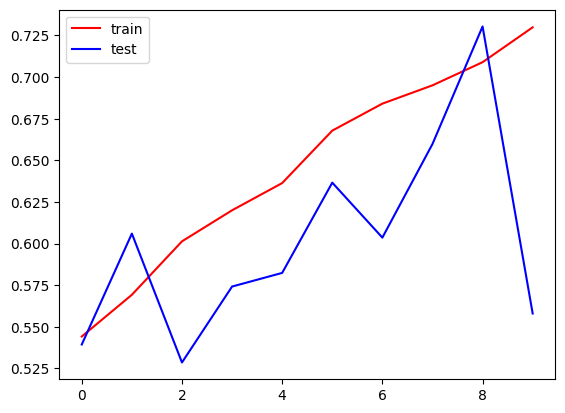

In [11]:
# visualizing the training accuracy and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'test')
plt.legend()
plt.show()

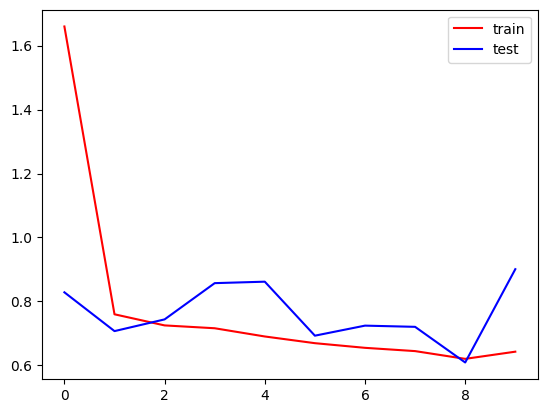

In [14]:
# visualizing the training loss and validation loss

plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'test')
plt.legend()
plt.show()

In [33]:
# prediction on new data
import cv2

In [63]:
predict_img1 = cv2.imread('/content/cat1.jpg')

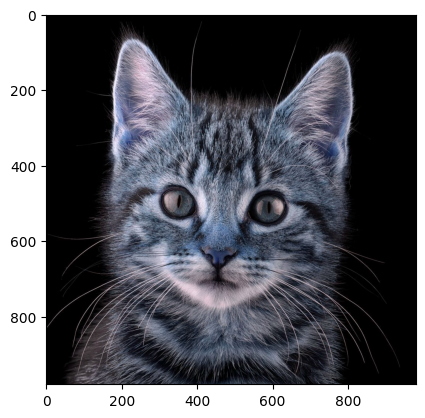

In [64]:
plt.imshow(predict_img1)

In [65]:
predict_img1.shape

(980, 980, 3)

In [66]:
predict_img1 = cv2.resize(predict_img1, (256,256))

In [67]:
input_img1 = predict_img1.reshape((1,256,256,3))

In [81]:
predicted_image1 =  model.predict(input_img1)

1/1 [==============================] - 0s 18ms/step


In [82]:
import numpy as np

predicted_image1 = np.array([[0.]])

if predicted_image1[0][0] > 0.5:
    print("its a dog")
else:
    print("its a cat")


its a cat


In [83]:
predict_img2 = cv2.imread('/content/dog.jpg')

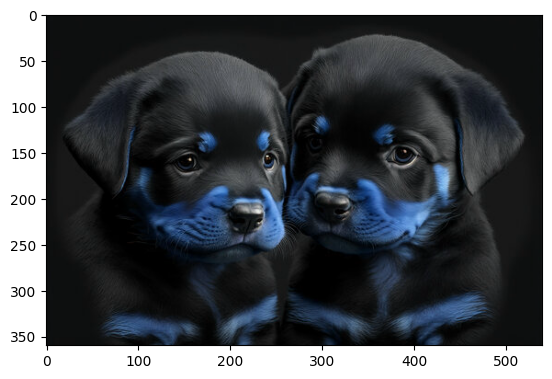

In [84]:
plt.imshow(predict_img2)


In [85]:
predict_img2 = cv2.resize(predict_img2, (256,256))

In [86]:
input_img2 = predict_img2.reshape((1,256,256,3))

In [95]:
predicted_image2 = model.predict(input_img2)

1/1 [==============================] - 0s 21ms/step


In [96]:
import numpy as np

predicted_image2 = np.array([[1.]])

if predicted_image2[0][0] > 0.5:
    print("its a dog")
else:
    print("its a cat")

its a dog
